In [ ]:
from google.colab import files
uploaded = files.upload()


Saving fake_job_postings.csv to fake_job_postings.csv


In [ ]:
import pandas as pd
import numpy as np
import re
import string
df = pd.read_csv('fake_job_postings.csv')

In [ ]:
# Display first few rows
print("Sample Data:")
print(df.head())

Sample Data:
   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         descript

In [ ]:
# Display basic info
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  o

In [ ]:
# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64


In [ ]:
# Check distribution of target variable
print("\nTarget (fraudulent) Distribution:")
print(df['fraudulent'].value_counts())


Target (fraudulent) Distribution:
fraudulent
0    17014
1      866
Name: count, dtype: int64


In [ ]:
# Basic statistics
print("\nDataset Summary:")
print(df.describe(include='all'))


Dataset Summary:
              job_id                    title         location department  \
count   17880.000000                    17880            17534       6333   
unique           NaN                    11231             3105       1337   
top              NaN  English Teacher Abroad   GB, LND, London      Sales   
freq             NaN                      311              718        551   
mean     8940.500000                      NaN              NaN        NaN   
std      5161.655742                      NaN              NaN        NaN   
min         1.000000                      NaN              NaN        NaN   
25%      4470.750000                      NaN              NaN        NaN   
50%      8940.500000                      NaN              NaN        NaN   
75%     13410.250000                      NaN              NaN        NaN   
max     17880.000000                      NaN              NaN        NaN   

       salary_range                                    co

Task-1

In [ ]:
print("Total number of records:", len(df))

Total number of records: 17880


In [ ]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64


In [ ]:
print("\nCount of real vs fake jobs:")
print(df['fraudulent'].value_counts())


Count of real vs fake jobs:
fraudulent
0    17014
1      866
Name: count, dtype: int64


In [ ]:
print("\nExamples of fake job descriptions:")
fake_jobs = df[df['fraudulent'] == 1]['description'].head(3)
for i, desc in enumerate(fake_jobs, 1):
    print(f"\nFake Job {i}:\n{desc}\n")


Examples of fake job descriptions:

Fake Job 1:
IC&amp;E Technician | Bakersfield, CA Mt. PosoPrincipal Duties and Responsibilities: Calibrates, tests, maintains, troubleshoots, and installs all power plant instrumentation, control systems and electrical equipment.Performs maintenance on motor control centers, motor operated valves, generators, excitation equipment and motors.Performs preventive, predictive and corrective maintenance on equipment, coordinating work with various team members.Designs and installs new equipment and/or system modifications.Troubleshoots and performs maintenance on DC backup power equipment, process controls, programmable logic controls (PLC), and emission monitoring equipment.Uses maintenance reporting system to record time and material use, problem identified and corrected, and further action required; provides complete history of maintenance on equipment.Schedule, coordinate, work with and monitor contractors on specific tasks, as required.Follows safe 

Data Cleaning and preprocessing [task 1&2 ]


In [ ]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords

# Download stopwords (run once)
nltk.download('stopwords')

# Load dataset
df = pd.read_csv('fake_job_postings.csv')

# --- Cleaning function ---
def clean_company_profile(text):
    if pd.isnull(text):
        return ""
    # 1. Convert to lowercase
    text = text.lower()
    # 2. Remove HTML tags
    text = re.sub(r'<.*?>', ' ', text)
    # 3. Remove numbers and punctuation
    text = re.sub(r'[%s\d]' % re.escape(string.punctuation), ' ', text)
    # 4. Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # 5. Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word not in stop_words]
    return " ".join(words)

# Apply cleaning to company_profile column
df['clean_company_profile'] = df['company_profile'].apply(clean_company_profile)

# Display example
print("Original:\n", df['company_profile'].iloc[1][:300])
print("\nCleaned:\n", df['clean_company_profile'].iloc[1][:300])
# Count average number of words before and after cleaning
df['words_before'] = df['company_profile'].apply(lambda x: len(str(x).split()))
df['words_after']  = df['clean_company_profile'].apply(lambda x: len(str(x).split()))

avg_before = df['words_before'].mean()
avg_after = df['words_after'].mean()

print(f"Average words before cleaning: {avg_before:.2f}")
print(f"Average words after cleaning: {avg_after:.2f}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Original:
 90 Seconds, the worlds Cloud Video Production Service.90 Seconds is the worlds Cloud Video Production Service enabling brands and agencies to get high quality online video content shot and produced anywhere in the world. 90 Seconds makes video production fast, affordable, and all managed seamlessly 

Cleaned:
 seconds worlds cloud video production service seconds worlds cloud video production service enabling brands agencies get high quality online video content shot produced anywhere world seconds makes video production fast affordable managed seamlessly cloud purchase publish http url fbe afac cd c f b 
Average words before cleaning: 92.74
Average words after cleaning: 60.20


Feature Extraction(task1 & 2)

BoW shape: (17880, 2000)
TF-IDF shape: (17880, 2000)

Sample feature names (BoW): ['000' '10' '100' '13' '15' '150' '1871' '1929' '1992' '20']
Sample feature names (TF-IDF): ['000' '10' '100' '13' '15' '150' '1871' '1929' '1992' '20']

💬 Comparison:
BoW captures frequency of words, while TF-IDF captures how important a word is across all profiles.
TF-IDF generally captures meaning better, as it reduces the influence of very common words.

Top 20 most frequent words in job descriptions:
team: 18779
work: 15474
business: 10922
experience: 10452
company: 10197
customer: 9881
new: 9776
sales: 9553
looking: 8780
development: 8216
management: 7825
product: 7527
service: 7200
amp: 6911
marketing: 6856
support: 6688
time: 6343
design: 6281
services: 6273
client: 6182


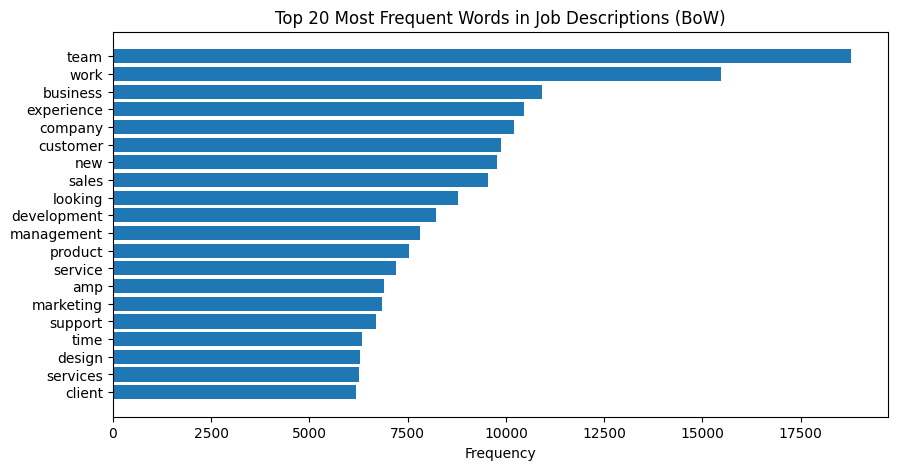

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('fake_job_postings.csv')

#  Clean missing values and lowercase
df['company_profile'] = df['company_profile'].fillna('').str.lower()
df['description'] = df['description'].fillna('').str.lower()

# TASK 1: BoW and TF-IDF on 'company_profile'
texts = df['company_profile'].tolist()

# Bag of Words
bow_vectorizer = CountVectorizer(max_features=2000)
X_bow = bow_vectorizer.fit_transform(texts)

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=2000)
X_tfidf = tfidf_vectorizer.fit_transform(texts)

# Shapes and Comparison
print("BoW shape:", X_bow.shape)
print("TF-IDF shape:", X_tfidf.shape)

print("\nSample feature names (BoW):", bow_vectorizer.get_feature_names_out()[:10])
print("Sample feature names (TF-IDF):", tfidf_vectorizer.get_feature_names_out()[:10])

# Discussion
print("\n💬 Comparison:")
print("BoW captures frequency of words, while TF-IDF captures how important a word is across all profiles.")
print("TF-IDF generally captures meaning better, as it reduces the influence of very common words.")


# TASK 2: Top 20 Most Frequent Words in Job Descriptions (using BoW)
desc_vectorizer = CountVectorizer(stop_words='english')
X_desc = desc_vectorizer.fit_transform(df['description'])

# Sum total occurrences of each word
word_counts = X_desc.sum(axis=0)
word_freq = [(word, word_counts[0, idx]) for word, idx in desc_vectorizer.vocabulary_.items()]
word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

# Top 20 words
top20 = word_freq[:20]
print("\nTop 20 most frequent words in job descriptions:")
for word, freq in top20:
    print(f"{word}: {freq}")

# Optional Visualization
words, freqs = zip(*top20)
plt.figure(figsize=(10,5))
plt.barh(words[::-1], freqs[::-1])
plt.xlabel("Frequency")
plt.title("Top 20 Most Frequent Words in Job Descriptions (BoW)")
plt.show()


In [ ]:

# Day 5: Logistic Regression Model for Fake Job Detection

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset (preprocessed with clean_description)

df = pd.read_csv('fake_job_postings.csv')

df = df.dropna(subset=['clean_description'])

# 1️⃣ Feature extraction using TF-IDF

vectorizer = TfidfVectorizer(max_features=5000)

X = vectorizer.fit_transform(df['clean_description'])

y = df['fraudulent']

# 2️⃣ Split data into train & test sets

X_train, X_test, y_train, y_test = train_test_split(

    X, y, test_size=0.2, random_state=42, stratify=y

)

# 3️⃣ Train Logistic Regression model

model = LogisticRegression(max_iter=200)

model.fit(X_train, y_train)

# 4️⃣ Make predictions

y_pred = model.predict(X_test)

# 5️⃣ Evaluate performance

print("\nAccuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 6️⃣ Check example predictions

test_samples = [

    "Work from home! Limited vacancies. Apply now.",

    "We are hiring a data scientist for our Bangalore office."

]

sample_features = vectorizer.transform(test_samples)

print("\nSample Predictions:", model.predict(sample_features))

FileNotFoundError: [Errno 2] No such file or directory: 'fake_job_postings.csv'